In [1]:
### PROGRAMA DE ASISTENCIA AL DISEÑO DE CONVERTIDOR DAB ###

#   Este programa ejecuta diferentes script de python con el objetivo
# de analizar diferentes puntos de funcionamiento del convertidor DAB.
# El codigo CalcularCtes.py es la pieza fundamental del programa, ya 
# que ejecuta el procedimiento de calcular las corrientes instantaneas
# y eficaces en el inductor y primario del transformador, a partir de
# los datos que se le otorguen. En su interior, dos funciones con el 
# mismo procedimiento, una realiza impresiones de pantalla y la otra
# retorna valores para utilizacion por funciones EntradaVariable.py y
# SalidaVariable.py
# 
# Los codigos en EntradaVariable.py y SalidaVariable.py permiten graficar
# la corriente eficaz en el inductor y primario de transformador (son
# iguales) para diferentes valores de tension de entrada y salida, 
# respectivamente. Utilizan la funcion CalcularCtes.py
# 
# El codigo en CorrienteMaxInductor.py permite calcular esa corriente,
# tambien haciendo uso de CalcularCtes.py pero esta vez variando la
# frecuencia, entre 10kHz y 50kHz, y en la condicion de maxima potencia
# de funcionamiento, que en este caso es cuando Vi=Vi_max=375V
# 
# El codigo en InduccionNucleos.py ejecuta el codigo de CorrienteMaxInductor.py
# multiples veces, permitiendo graficar la induccion magnetica presente
# en el nucleo del transformador con la variacion de frecuencia, con el
# fin de seleccionar un nucleo con caracteristicas de induccion de 
# saturacion superiores, asistiendo el diseño del convertidor DAB.

# Funciones de python
import math
import numpy as np
import matplotlib as plt
# Funciones programadas para el diseño
import CalcularCtes
import SalidaVariable
import EntradaVariable
import Parametricas
import CorrienteMaxInductor
import InduccionNucleos

Vi_n=300    #Tension nominal de entrada
Vo_n=400    #Tension nominal de salida

Vo_min = 320    #Minima tension de salida
Vo_max = 480    #Maxima tension de salida
Vi_min = 250    #Minima tension de entrada
Vi_max = 375    #Maxima tension de entrada

n=1.33      #Relacion del transformador de alta frecuencia
D=0.4       #Desfase porcentual entre puentes (adimensional)
Pmax = 6000
Gcc_min = 0.8
#Gcc_max = 1.2
L=56.25e-6     #Inductancia equivalente entre perdidas de nucleo e inductor complementario
fs=40e3     #Frecuencia de conmutacion de llaves electronicas IGBT

CalcularCtes.Calcular(Vi_max,Vo_n,n,D,L,fs) #Ejecuta funcion en CalcularCtes.py en peor condicion

********************************************************
********* CORRIENTES EN CONDICION MAS EXIGENTE *********
********************************************************
Parametros:

Tension de entrada                   Vi =  375  [V]
Tension de salida                    Vo =  400  [V]
Relacion de transformacion           n =  1.33
Desfase entre puentes en radianes    phi =  1.26 rad
Desfase porcentual entre puentes     D =  0.4
Inductancia equivalente total        L =  56.25 [uHy]
Frecuencia de conmutacion            fs =  40.0 [kHz]

Variaciones absolutas de corriente por intervalo en PRIMARIO [P] e INDUCTOR [L]:

Intervalo [0:phi]                    dI1 =  60.1  [A]
Intervalo [phi:PI]                   dI2 =  9.9  [A]
Intervalo [PI:PI+phi]                dI3 =  -60.1  [A]
Intervalo [PI+phi:2*PI]              dI4 =  -9.9  [A]

Corrientes instantaneas en PRIMARIO [P] e INDUCTOR [L] en puntos de inflexion:

Fase=0                               I0 =  -35.0  [A]
Fase=phi                

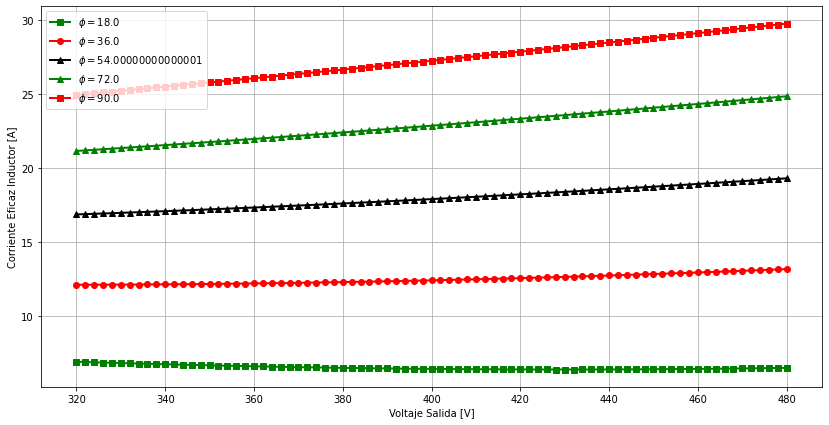

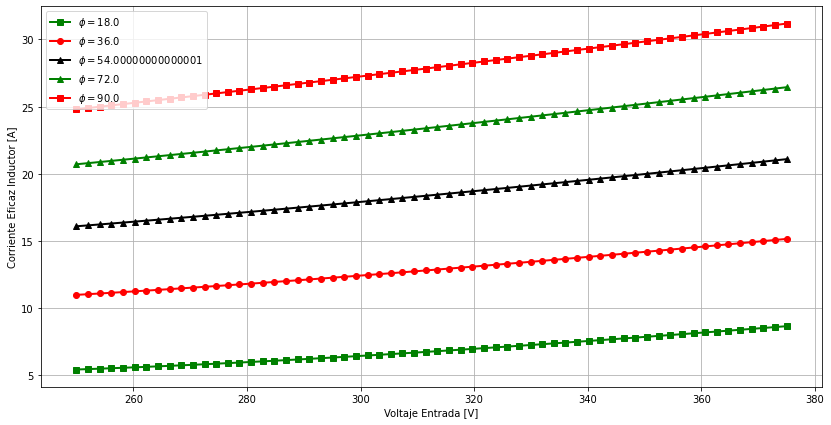

In [2]:
pts = 81    #Numero de puntos a graficar
SalidaVariable.graficarCorriente(Vi_n,Vo_min,Vo_max,n,L,fs,pts)
pts = 62    #Numero de puntos a graficar
EntradaVariable.graficarCorriente(Vo_n,Vi_min,Vi_max,n,L,fs,pts)

********************************************************
********* INDUCCIONES EN CONDICION MAS EXIGENTE ********
********************************************************

Inducciones en nucleos segun la frecuencia y parametro Area-Producto Ap.
La inductancia se ajusta al variar la frecuencia, manteniendo la potencia de diseño.


 NUMERO ESPIRAS PRIMARIO SIN REDONDEAR PARA NUCLEO  E422120 	Np =  9.870216648248569

NUMERO ESPIRAS FINAL 	 Np =  9
Nucleo: 	 E422120 				Ap =  58633.0  [mm4]
 f = 25 [kHz]			L =  [90.]  [uHy]				B =  [1819.5]  [mT]		 (B/Bsat)*100% =  [568.6] %
 f = 30 [kHz]			L =  [75.]  [uHy]				B =  [1516.3]  [mT]		 (B/Bsat)*100% =  [473.8] %
 f = 35 [kHz]			L =  [64.29]  [uHy]				B =  [1299.6]  [mT]		 (B/Bsat)*100% =  [406.1] %
 f = 40 [kHz]			L =  [56.25]  [uHy]				B =  [1137.2]  [mT]		 (B/Bsat)*100% =  [355.4] %

 NUMERO ESPIRAS PRIMARIO SIN REDONDEAR PARA NUCLEO  E552821 	Np =  9.870216648248569

NUMERO ESPIRAS FINAL 	 Np =  9
Nucleo: 	 E552821 				Ap =  92686.0  [mm4]

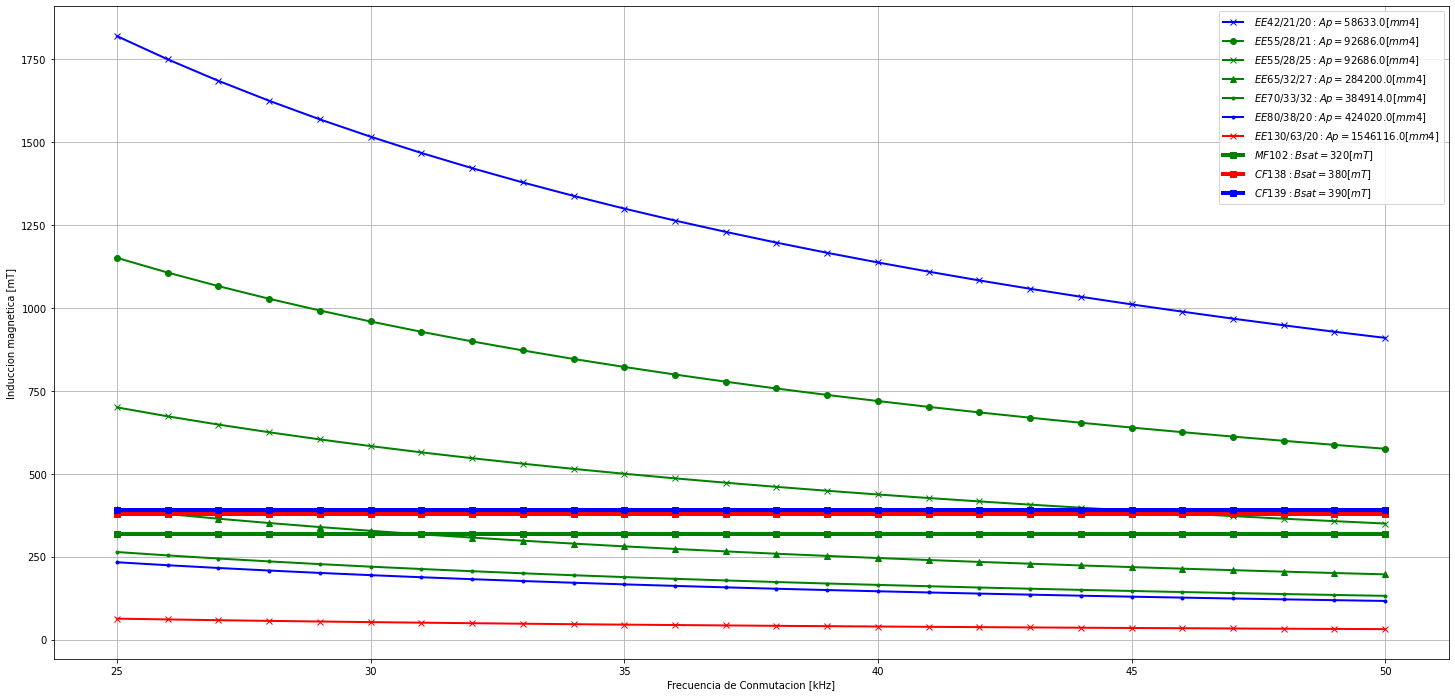

In [3]:
# Para graficar corriente eficaz en inductor en funcion de 
# la frecuencia entre 10kHz y 50kHz. 

#CorrienteMaxInductor.graficarParametrica(Vi_max,Vo_n,n,D,L)

# Variables especificas codigo InduccionNucleos.py
# Calculos de constantes Ap=Aw*Ae para diferentes nucleos
# disponibles en el mercado.

J=4.1*1e6   # Densidad de corriente
k=0.75      # Factor de apilamiento

# Nucleo EI2811
#Aw0 = 6.35*12.8*2
#Ae0 = 76
#Ap0 = Aw0*Ae0/1e12 #6177 mm4

# Nucleo E422120    Material : CF139-3C94   Bsat=320mT
Aw0 = 8.65*14.8*2
Ae0 = 229
Ap0 = Aw0*Ae0/1e12 # 58633 mm4

# Nucleo E552821    Material : Mf102        Bsat=320mT
#Aw1 = 10.15*18.5*2
#Ae1 = 349
#Ap1 = Aw1*Ae1/1e12 # 131066 mm4

# Nucleo     Material : Mf102        Bsat=320mT
Aw1 = 8.65*14.8*2
Ae1 = 181*2
Ap1 = Aw1*Ae1/1e12 # 131066 mm4

# Nucleo     Material : Mf102        Bsat=320mT
Aw2 = 11*38
Ae2 = 21*17
Ap2 = Aw1*Ae1/1e12 # 131066 mm4

# Nucleo E552825    Material : Mf102        Bsat=320mT
#Aw2 = 10.15*18.5*2
#Ae2 = 417
#Ap2 = Aw2*Ae2/1e12 # 156604 mm4

# Nucleo E653227    Material : Mf102        Bsat=320mT
Aw3 = 12.1*22.2*2
Ae3 = 529
Ap3 = Aw3*Ae3/1e12 # 284199 mm4

# Nucleo E703332    Material : Mf102        Bsat=320mT
Aw4 = 13*21.9*2
Ae4 = 676
Ap4 = Aw4*Ae4/1e12 # 384914 mm4

# Nucleo E803820    Material : CF139-3C94   Bsat=320mT
Aw5 = 19.65*28.2*2
Ae5 = 382.6
Ap5 = Aw5*Ae5/1e12 # 424020 mm4

# Nucleo E1306320   Material : CF138-3C85-3C90  Bsat=320mT
Aw6 = 24*42.5*2
Ae6 = 757.9
Ap6 = Aw6*Ae6/1e12 # 1546116 mm4


Ap_vector = np.array([Ap0,Ap1,Ap2,Ap3,Ap4,Ap5,Ap6])
Ae_vector = np.array([Ae0/1e6,Ae1/1e6,Ae2/1e6,Ae3/1e6,Ae4/1e6,Ae5/1e6,Ae6/1e6])
Aw_vector = np.array([Aw0,Aw1,Aw2,Aw3,Aw4,Aw5,Aw6])

InduccionNucleos.graficarInducciones(Aw_vector,Ae_vector,Ap_vector,Vi_max,Vo_n,n,D,Pmax,Gcc_min,k,J)